In [1]:
from os import chdir
from pathlib import Path
if Path.cwd().stem == "notes": chdir('../')

In [2]:
import sys

In [3]:
sys.version

'3.8.0 (default, Oct 28 2019, 16:14:01) \n[GCC 8.3.0]'

In [6]:
import matplotlib

In [7]:
import matplotlib.pyplot as plt

In [8]:
from mpl_toolkits.mplot3d import Axes3D

In [56]:
import numpy

In [57]:
from sympy import *

$\left(x-a\right)^2+\left(y-b\right)^2=r^2$

If $i$ and $j$ represent the horizontal and vertical distances from the starting point $P$ to the center of the circle, then $c_1 = p_1+i$ and $c_2=p_2+j$.

That was convenenient. If, on the other hand, all we have is the radius of the circle...

$$\left(p_1-a\right)^2+\left(p_2-b\right)^2=r^2$$

$$\left(q_1-a\right)^2+\left(q_2-b\right)^2=r^2$$

So, with numbers obtained from the `gcode` block in question capitalized, we need to solve the following system of equations for $a$ and $b$.

$$\left(X_0-a\right)^2+\left(Y_0-b\right)^2=R^2$$

$$\left(X-a\right)^2+\left(Y-b\right)^2=R^2$$

$X_0$ and $Y_0$ represent the current tool position in the equation above, and are therefore known quantities at the time of computation.

In [58]:
x, y, z, X, X0, Y, Y0, Z, Z0, R = symbols("x y z X X0 Y Y0 Z Z0 R")

In [59]:
e1 = (x-X0)**2 + (y-Y0)**2

In [60]:
e2 = (x-X)**2 + (y-Y)**2

[Here](https://math.stackexchange.com/questions/1781438/finding-the-center-of-a-circle-given-two-points-and-a-radius-algebraically) is the answer from Stack Exchange.

That question / answer also references [this](http://mathforum.org/library/drmath/view/54490.html) newsgroup message from who knows when?

In [61]:
init_printing()

In [62]:
help(init_printing)

Help on function init_printing in module sympy.interactive.printing:

init_printing(pretty_print=True, order=None, use_unicode=None, use_latex=None, wrap_line=None, num_columns=None, no_global=False, ip=None, euler=False, forecolor=None, backcolor='Transparent', fontsize='10pt', latex_mode='plain', print_builtin=True, str_printer=None, pretty_printer=None, latex_printer=None, scale=1.0, **settings)
    Initializes pretty-printer depending on the environment.
    
    Parameters
    
    pretty_print : boolean, default=True
        If True, use pretty_print to stringify or the provided pretty
        printer; if False, use sstrrepr to stringify or the provided string
        printer.
    order : string or None, default='lex'
        There are a few different settings for this parameter:
        lex (default), which is lexographic order;
        grlex, which is graded lexographic order;
        grevlex, which is reversed graded lexographic order;
        old, which is used for compatibil

In [63]:
from enum import IntEnum

class CircularPlane(IntEnum):
    XY = 17
    ZX = 18
    YZ = 19
    


In [64]:
xa = (X - X0) / 2

In [65]:
ya = (Y - Y0) / 2

In [66]:
x0, y0 = X0 + xa, Y0 + ya

In [67]:
a = sqrt(xa**2 + ya**2)

In [68]:
b = sqrt(R**2 - a**2)

In [69]:
x3 = x0 + b*ya / a

In [70]:
x4 = x0 - b*ya / a

In [71]:
y3 = y0 - b*xa / a

In [72]:
y4 = y0 + b*xa / a

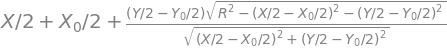

In [73]:
x3

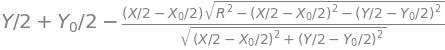

In [74]:
y3

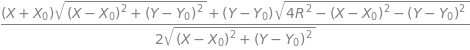

In [75]:
x3.simplify()

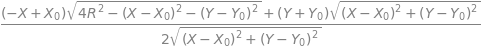

In [76]:
y3.simplify()

In [77]:
params = dict(zip([X0, Y0, X, Y, R], [1, 4, 5, 1, 13/2]))

In [78]:
x3 = x3.subs(params)

In [79]:
y3 = y3.subs(params)

In [80]:
x4 = x4.subs(params)

In [81]:
y4 = y4.subs(params)

In [82]:
T1, T2 = symbols("T1, T2")

In [83]:
C1 = Point3D(x3.subs(params), y3.subs(params))

In [84]:
x3, y3, x4, y4

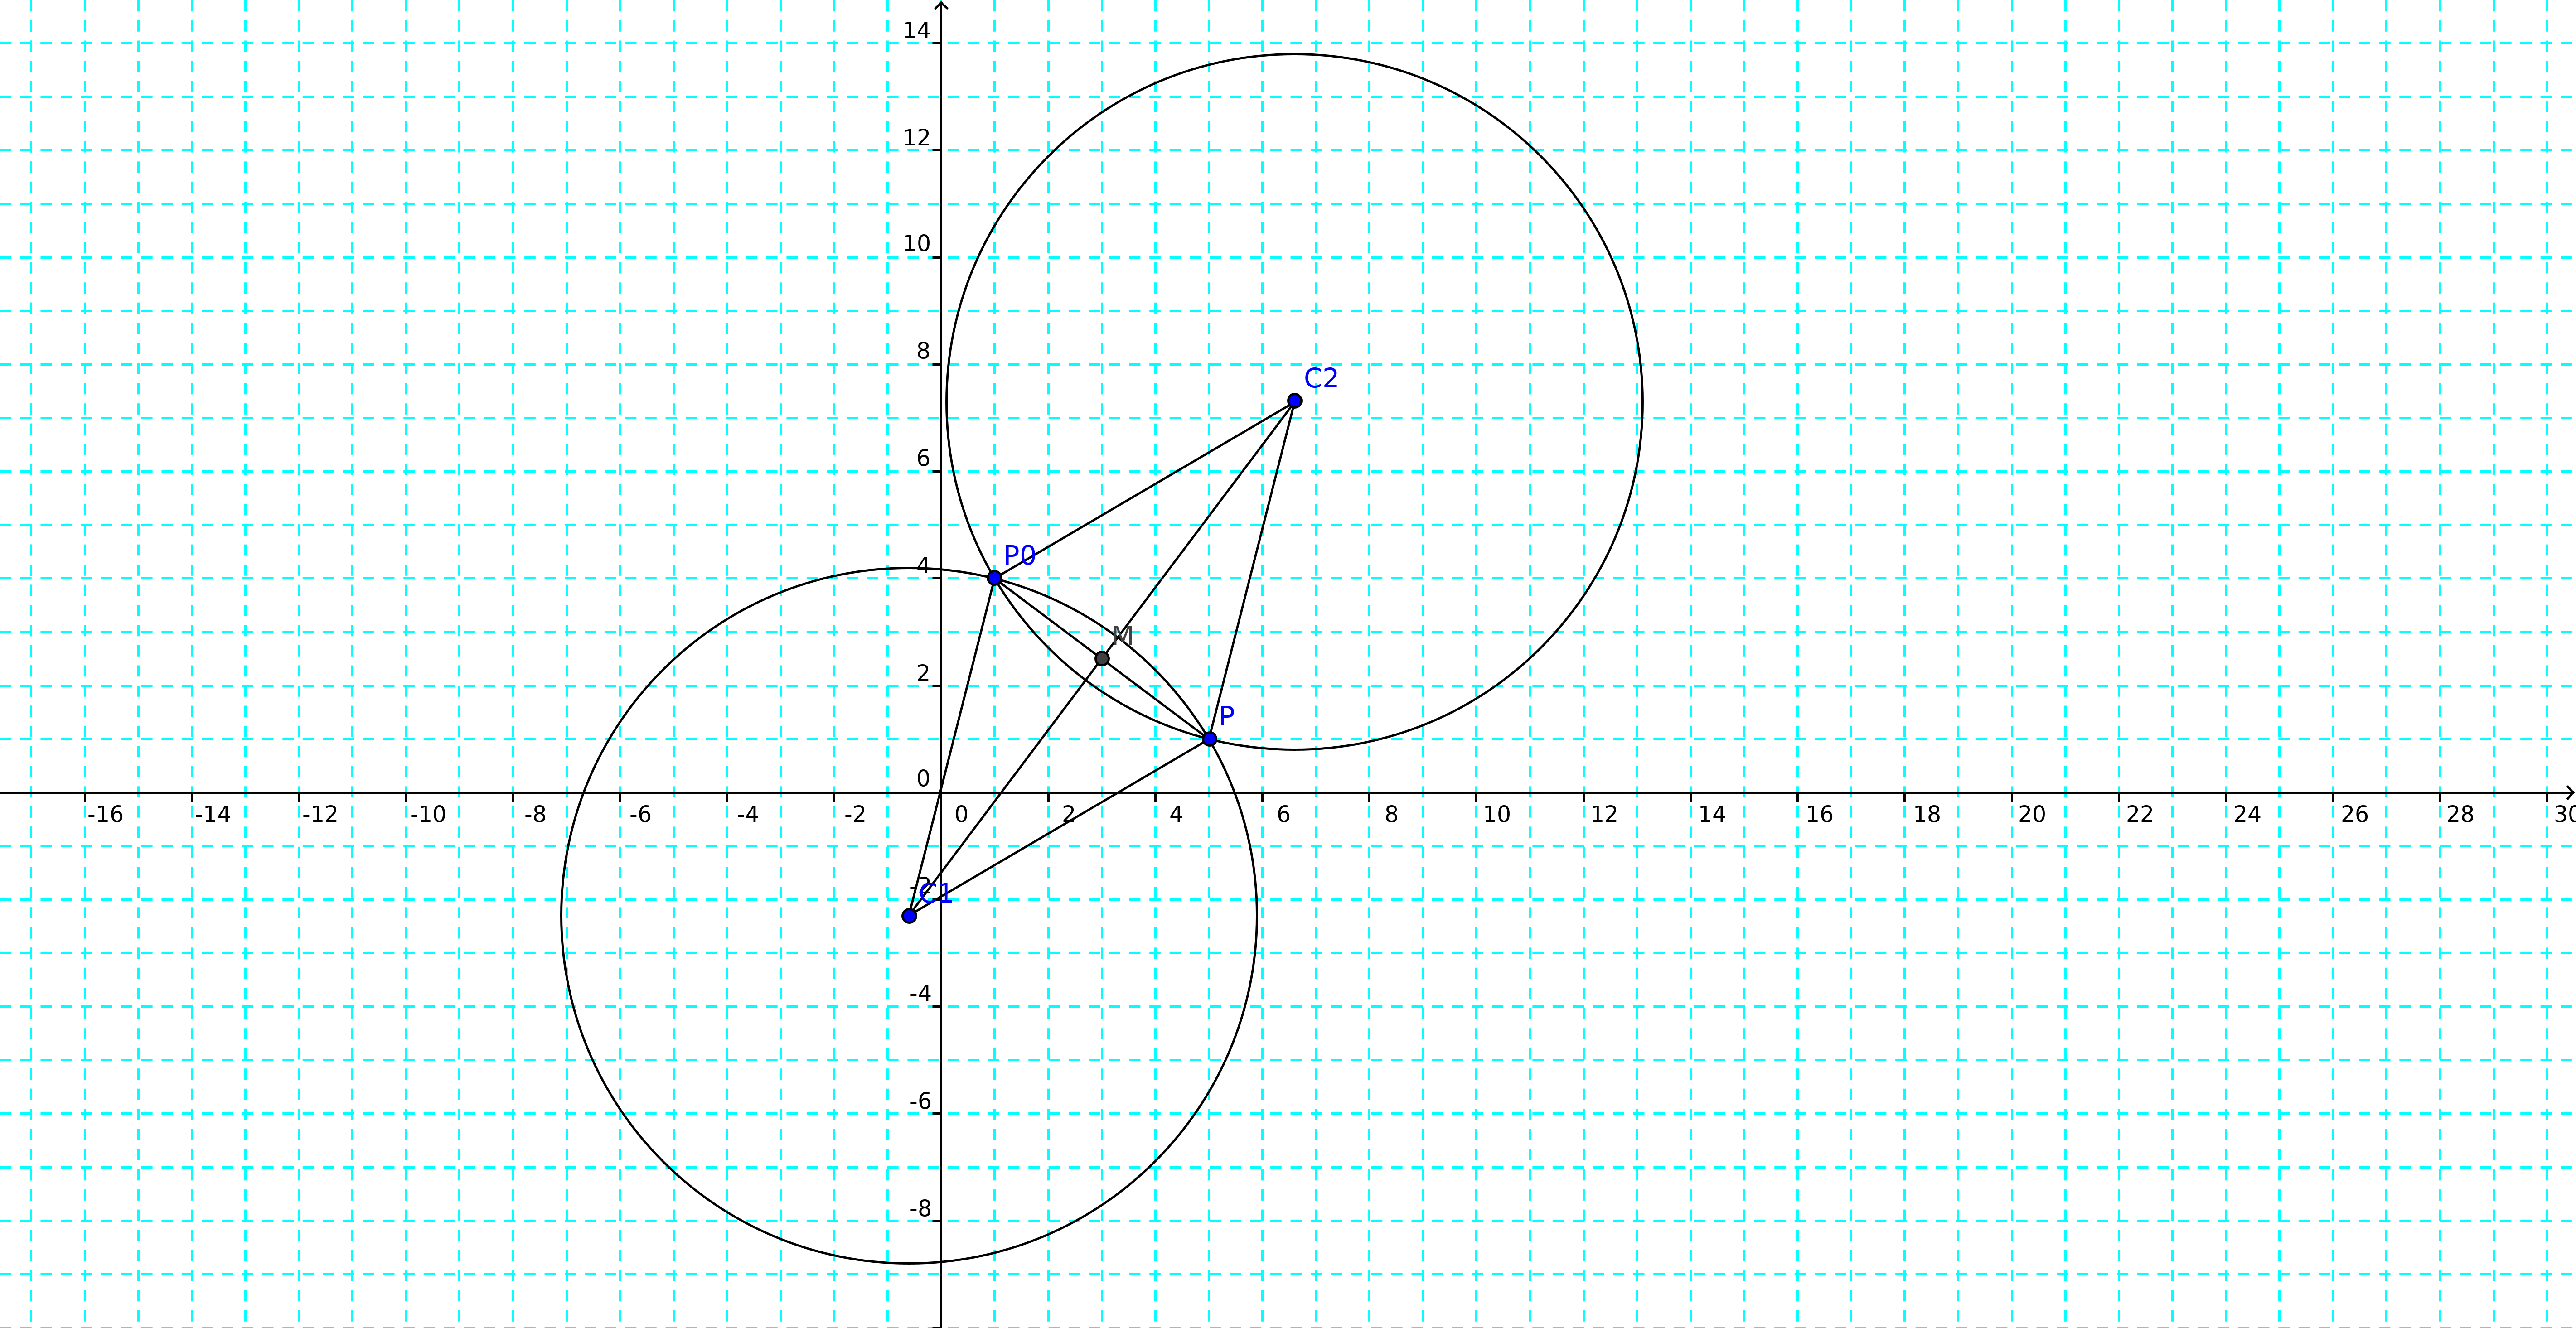

In [85]:
from IPython.display import Image
Image("png/circles0000.png")

$$AC_1=0$$

In [86]:
args1 = [-x3, -y3]
args2 = [1/params[R]] * 3
Q0 = Point3D(params[X0], params[Y0], 0).translate(*args1).scale(*args2).evalf()
Q = Point3D(params[X], params[Y], 0).translate(*args1).scale(*args2).evalf()
print("1/R:", 1/params[R])
print("Q0:", Q0)
print("Q:", Q)

1/R: 0.15384615384615385
Q0: Point3D(0.246153846153846, 0.969230769230769, 0)
Q: Point3D(0.861538461538462, 0.507692307692308, 0)


Get the angles...

In [87]:
theta1 = atan(Q0.y / Q0.x)
theta1

In [88]:
def rad2deg(t):
    return ((t % pi) * 180 / pi).evalf()

def deg2rad(t):
    return (pi * t / 180 % (pi / 2)).evalf()

In [89]:
from anglr import Angle

In [90]:
dir(Angle)

['__abs__',
 '__add__',
 '__class__',
 '__complex__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__float__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__le__',
 '__lt__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__pos__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmul__',
 '__round__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__truediv__',
 '__weakref__',
 'angle_between',
 'angle_between_clockwise',
 'angle_to',
 'angle_within',
 'arcminutes',
 'arcseconds',
 'degrees',
 'dump',
 'gradians',
 'hours',
 'normalized',
 'vector',
 'x',
 'y']

In [91]:
help(Angle.__init__)

Help on function __init__ in module anglr:

__init__(self, value=0, mode='radians')
    Creates an `Angle` instance representing the angle `value` in the angular unit specified by `mode`.
    
    `mode` can be "radians", "degrees", "gradians", "hours", "arcminutes", "arcseconds", or "vector" (see `angle_instance.vector` for more info).



In [92]:
P = Point3D()
Q
P.translate(*-Q)

In [93]:
rad2deg(theta1)

In [94]:
theta2 = atan(Q.y / Q.x)
rad2deg(theta2)

In [95]:
help(Angle.angle_between)

Help on function angle_between in module anglr:

angle_between(self, angle)
    Returns a new `Angle` instance that represents the smallest of the two possible angles between `Angle` instance to `angle` on the unit circle (this is always non-negative).



In [96]:
t1 = Angle(theta1)
t2 = Angle(theta2)
t3 = t1.angle_between_clockwise(t2)

In [97]:
from math import pi as PI
PI

In [98]:
t3.radians > PI

True

In [99]:
import matplotlib.path
matplotlib.path.Path.arc(t1.degrees, t2.degrees).vertices.transpose()[0]

array([ 0.24615385,  0.13495359,  0.01971801, -0.09449899, -0.20871598,
       -0.32021988, -0.42412041, -0.52802095, -0.62277666, -0.70423183,
       -0.785687  , -0.85263315, -0.90213422, -0.95163529, -0.98295688,
       -0.99472531, -1.00649374, -0.99853442, -0.97119641, -0.9438584 ,
       -0.8975473 , -0.83429418, -0.77104106, -0.69178434, -0.6       ,
       -0.50821566, -0.40526542, -0.29566438, -0.18606334, -0.07143754,
        0.04318584,  0.15780922,  0.27072965,  0.37699473,  0.48325981,
        0.58129301,  0.66679486,  0.75229671,  0.82399871,  0.8787562 ,
        0.9335137 ,  0.97051431,  0.98813529,  1.00575627,  1.0037362 ,
        0.98216368,  0.96059115,  0.91978621,  0.86153846])

In [100]:
help(map)

Help on class map in module builtins:

class map(object)
 |  map(func, *iterables) --> map object
 |  
 |  Make an iterator that computes the function using arguments from
 |  each of the iterables.  Stops when the shortest iterable is exhausted.
 |  
 |  Methods defined here:
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __iter__(self, /)
 |      Implement iter(self).
 |  
 |  __next__(self, /)
 |      Implement next(self).
 |  
 |  __reduce__(...)
 |      Return state information for pickling.
 |  
 |  ----------------------------------------------------------------------
 |  Static methods defined here:
 |  
 |  __new__(*args, **kwargs) from builtins.type
 |      Create and return a new object.  See help(type) for accurate signature.



In [101]:
help(numpy.full)

Help on function full in module numpy:

full(shape, fill_value, dtype=None, order='C')
    Return a new array of given shape and type, filled with `fill_value`.
    
    Parameters
    ----------
    shape : int or sequence of ints
        Shape of the new array, e.g., ``(2, 3)`` or ``2``.
    fill_value : scalar
        Fill value.
    dtype : data-type, optional
        The desired data-type for the array  The default, `None`, means
         `np.array(fill_value).dtype`.
    order : {'C', 'F'}, optional
        Whether to store multidimensional data in C- or Fortran-contiguous
        (row- or column-wise) order in memory.
    
    Returns
    -------
    out : ndarray
        Array of `fill_value` with the given shape, dtype, and order.
    
    See Also
    --------
    full_like : Return a new array with shape of input filled with value.
    empty : Return a new uninitialized array.
    ones : Return a new array setting values to one.
    zeros : Return a new array setting values 

In [102]:
import numpy
public(numpy)

TypeError: expected a function or a class, got <module 'numpy' from '/home/fuzzy/projects/py38/venv/py38/lib/python3.8/site-packages/numpy/__init__.py'>

In [ ]:
public(numpy.ndarray)

In [ ]:
help(numpy.ndarray.transpose)

In [ ]:
public(matplotlib.path.Path)

In [ ]:
from enum import Enum
class Quadrants(Enum):
    I = "I"
    II = "II"
    III = "III"
    IV = "IV"
    
class Directions(Enum):
    CW = 0
    CCW = 1

def quadrant(P):
    if P.x >= 0:
        if P.y > 0:
            return Quadrants.I
        else: return Quadrants.IV
    else:
        if P.y > 0:
            return Quadrants.II
        else:
            return Quadrants.III
        
def get_angle(P):
    return atan(P.y / P.x)

def rotate(*args, radians=(pi/2).evalf(), degrees=90):
    pass
        
def direction(P1, P2):
    """ Return the direction travelled to reach P2 from P1 via the shortest path.
    """
    t1 = get_angle(P1)
    t2 = get_angle(P2)
    if not quadrant(P1) == Quadrants.I:
        pass
    if quadrant(P1) == Quadrants.I:
        if quadrant(P2) == Quadrants.I:
            if t1 - t2 > 0:
                return Directions.CW
            else:
                return Directions.CCW
        if quadrant(P2) == Quadrants.II:
            return CCW
        if quadrant(P2) == Quadrants.III:
            if t2 < t1 + 180:
                return Directions.CCW
            else:
                return Directions.CCW
        if quadrant(P2) == Quadrants.IV:
            return Directions.CW

In [ ]:
rotate

In [ ]:
T1 = Matrix([[1/params[R], 0, -x3], [0, 1/params[R], -y3]])

$\begin{matrix}
  -1 & 3 \\
  2 & -4
 \end{matrix}$

In [ ]:
v3 = Matrix([x3, y3, 1])
v4 = Matrix([x4, y4, 1])

In [ ]:
v3

In [ ]:
T1 * v3

In [ ]:
T1 * v4

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.plot([v3[0], v3[1]])

In [ ]:
v3

In [ ]:
pwd

In [ ]:
from os import chdir

In [ ]:
chdir('../../')

In [ ]:
from py.startup import *

In [ ]:
import mpl_toolkits.mplot3d
plt.ion()

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
